# Gaussian Mixture Validation

Validation code that simulates reaction time data and use gaussian mixture classification to study the recovery accuracy of the reaction time data. 

TODOs: 
1. [x] Simulate reaction time data using mixture of exponential normal distribution with various means and variances, or parameters, Evaluate the recoverability of the gaussian mixture on such models using classification accuracy measure with various means and variances. Set a threshold for the reliability 

2. [x] Participantwise Model Goodness of Fit Comparison 

3. [x] To make the experiment more rigorious, maybe add mean and variance to the method. 


an exponenitially modified normal continuous random variable 

rt data have disperse distributions toward longer RTS, 

https://lindeloev.github.io/shiny-rt/

a dominant feature of RTs is the standard deviation increases linearly with the mean.
One parameter that changes both. 

An exponentially modified Normal continuous random variable


the pdf of the exponentially modififed normal distribution can be understood as the sum of independent normal and exponential random variables, an exgayssian random variable Z can be expressed as Z = X + Y, where X and U are independent, X is gaussian distributed with mean mu and variance sigma square, and Y is exponential of rate lambda. 

Y can be some random process that is exponenitally distributed. 

Here we inherently assume that the two reaction time are both exponentially modified normally distributed. 


There are three parameters, lambda, which is the rate of the exponential component
sigma square, which is the variance pf the gaussian component
and mu, which is the mean of the gaussian component

https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution



In [95]:
from scipy.stats import exponnorm
from analysis_util import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Generate histogram of specified parameters

# Study parameter dependency

Exponentially modifed Gaussian distribution is used to simulate participants' reaction time for the vaidation method. This comes from the idea that exponentially modified gaussian generatives strictly positive reaction times, and has been suggested by some literature that it can be a better model than log normal to model reaction time distribution. 

lambda controlls the decay rate of the exponential component, the smaller the lambda the slower the decay rate. 
mu is the parameter that adjusts the mean of the distribution, the higher mu the higher the distribution. 
sigma controls the spread of the distribution, the bigger the wider. 


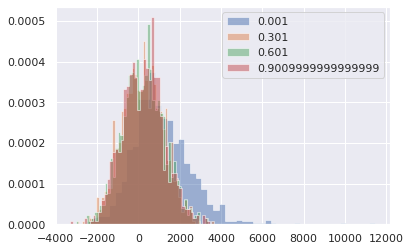

In [96]:
# What happens when different parameters changes


sigma = 1000
mu = 200
fig, ax = plt.subplots(1, 1)
lambdas = np.arange(0.001,1,0.3)
for lambd in lambdas: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(lambdas))    
plt.show()



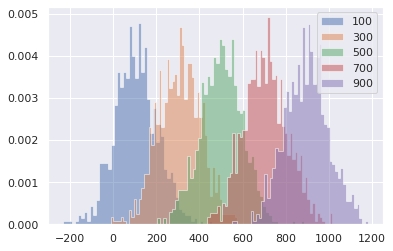

In [97]:
# What happens when different parameters changes
sigma = 100
fig, ax = plt.subplots(1, 1)
lambd = 1
mus = np.arange(100,1000,200)
for mu in mus: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(mus))    
plt.show()


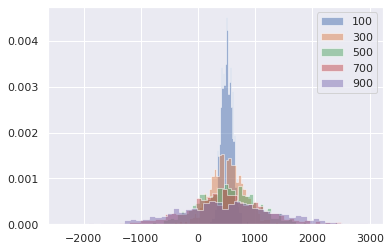

In [98]:
# What happens when different parameters changes
mu = 500
fig, ax = plt.subplots(1, 1)
lambd = 1
sigmas = np.arange(100,1000,200)
for sigma in sigmas: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(mus))    
plt.show()

In [7]:
r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=1000)
r_betw = exponnorm.rvs(1/(sigma_betw*lambda_betw),mu_betw,sigma_betw, size=1000)
print(r_within)

NameError: name 'sigma_within' is not defined

In [99]:
mu_within = 200
d_mu = 200 # difference in mean
mu_betw = mu_within + d_mu
lambda_within = 1
lambda_betw = lambda_within
sigma_within = 100
sigma_betw = 80


sigma = sigma_within
lambd = lambda_within
mu = mu_within
K = 1/(sigma*lambd)
mean, var, skew, kurt = exponnorm.stats(K,mu,sigma, moments='mvsk')

r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=100)



print(np.concatenate([r_within,r_within]))
# plt.show()

[250.88843714 189.70258609 167.72694817 148.48271021 332.22528294
 -20.42482558 367.40538824 285.51972026 219.26418548 189.23183132
 310.59388437 -53.23388798 220.46990553 290.55462526 102.65336518
 126.99590249 183.28000851 469.98301524 -50.47074151 136.1465364
  84.39250973 207.97561683 208.0507347  155.96942864 338.86609248
  61.22065613 218.74443272 345.86643144 201.52526562 130.79572836
 233.42975663 245.73449458 215.48967558 178.01779168 100.15816053
 209.77666253  72.3277896  341.70581294 203.35451496 259.30331762
 384.36923475 335.53187769 338.03015416 167.3528838  -41.07418034
 -43.21380775 247.10017052 199.27623757  58.92053372 216.16701788
 158.63792283 167.60218639 230.77867509  50.3360479  346.80068329
 337.64072984 141.93531453 380.20382107 172.27648647 167.62416071
 308.52079958 258.06255471 406.15392413 445.774757   146.50952426
  92.51610029 220.25502485 183.04325272 232.04272647 423.86931345
 168.54553038 168.91578879 269.3619089  430.07761499 288.43821858
 296.075845


How classification accuracy changed between different parameters

In [100]:
np.arange(80,150,10)

array([ 80,  90, 100, 110, 120, 130, 140])

In [52]:
lambda_within = 1# same decay for both
lambda_betw = lambda_within
n_within = 500# number of within_chunk_reaction times
n_between = 500
sigma_within_set = list(np.arange(80,150,10))
sigma_betw_set = list(np.arange(80, 150,10))
mu_diff_set = list(np.arange(100,800,20))# used to be 200 to 1000
acc_record = np.zeros([len(sigma_within_set),len(sigma_betw_set), len(mu_diff_set)])

print(sigma_within_set)

[80, 90, 100, 110, 120, 130, 140]


In [54]:
n_sample = 1
for i in range(0,len(sigma_within_set)):
    for j in range(0, len(sigma_betw_set)):
        for k in range(0, len(mu_diff_set)):
            # generate reaction time by sampling from two exponential normal distribution          
            sigma_within = sigma_within_set[i]
            sigma_betw = sigma_betw_set[j]
            mu_diff = mu_diff_set[k]
            mu_within = 200
            mu_betw = mu_within + mu_diff
            r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=n_within)
            r_betw = exponnorm.rvs(1/(sigma_betw*lambda_betw),mu_betw,sigma_betw,size = n_between)
            r_mixed = np.concatenate([r_within,r_betw])
            ground_truth = np.ones(r_mixed.shape, dtype = bool)
            ground_truth[len(r_within):] = False
            
            accuracy = np.zeros(n_sample)
            for s in range(0,n_sample):
                _,classification = mixture_gaussian_classification(r_mixed.reshape((-1,1)))
                accuracy[s] = evaluate_classification_accuracy(ground_truth, classification)
            acc_record[i,j,k] = np.mean(accuracy)
            # classify r_mixed 

# make parameter varying plot. 

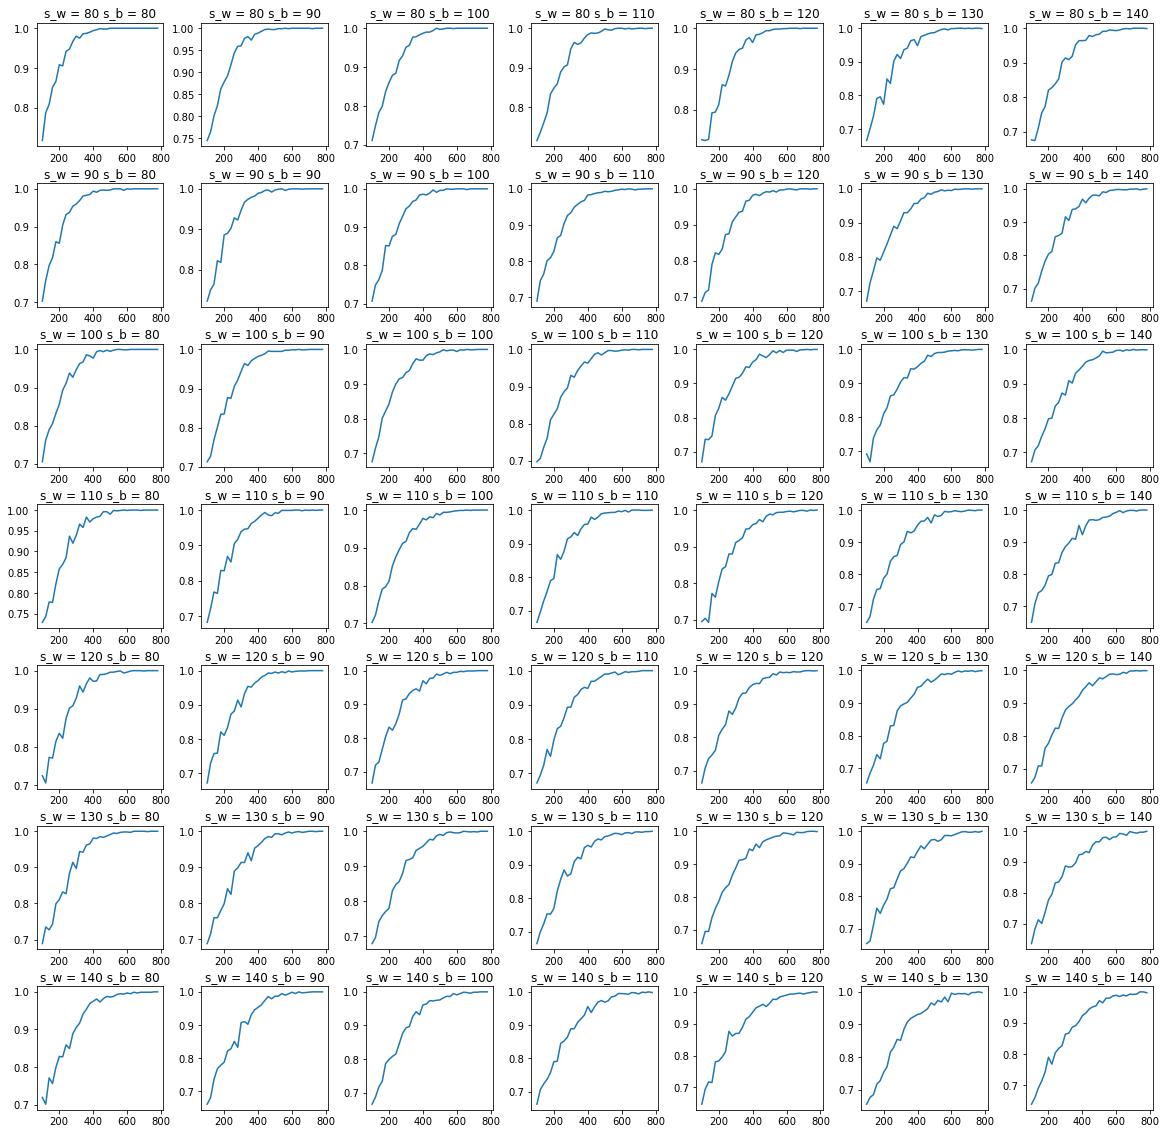

In [55]:
plt.figure(figsize = (20,20))

# fig, axes = plt.subplots(len(sigma_within_set), len(sigma_betw_set))
plt.tight_layout(pad = 0.1) # Or equivalently,  "plt.tight_layout()"

k = 0
for i in range(1,1+len(sigma_within_set)):
    for j in range(1, 1+len(sigma_betw_set)):
        k = k + 1
        plt.subplot(len(sigma_within_set), len(sigma_betw_set),k)
        plt.plot(mu_diff_set, acc_record[i-1,j-1,:])
        titl = 's_w = ' + str(sigma_within_set[i-1]) + ' s_b = ' + str(sigma_betw_set[j-1])
#         plt.xlabel('mean difference')
#         plt.ylabel('accuracy')
#         plt.ylim([0.7,1.0])
        plt.title(titl)

plt.subplots_adjust(wspace=0.3, hspace = 0.3)

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

plt.show()

In [ ]:
# within chunk reaction time is assumed to have mean 200, standardeviation of 100, and between chunk reaction time has a mean of 400, and
# and sigma = 90. Finally, the kurtosis of the two distributions are fixed to be one. Thereby, we generate 
# 500 samples of within chunk reaction time, and 500 samples of between chunk reaction time, so that the total is aligned
# with the number of data points collected from each participant in an entire experiment. 
# additional, we vary the mean difference between the two distribution from 200 ms to 1000 ms in 20 steps, 
# and the variance between the two distribution is varying from 80 to 150 in steps of 10. 
# figure xxx plots the recovery accuracy of the mixture of gaussian classification on an x access of increasing mean difference
# and y axis of accuracy. From left to right,the between chunk reaction time increases,
# from up to down, the within chunk reaction time increases. 
# note that the worst recovery scenario is when the rt has a small difference in mean, and both variances are big.
# even in these cases, above 75% of the reaction times are classified correctly. 

# concern, if the standard deviation is 100ms, then the gaussian mixture is not very good to distinguish the two distributions
# and would make some mistakes. On the other hand, if the reaction time is in the small or large mixture end, they would be
# classified correspondingly. 

In [9]:
def evaluate_classification_accuracy(ground_truth, classification):
    return np.sum(np.abs(ground_truth == classification))/len(ground_truth)

In [144]:
evaluate_classification_accuracy(np.array([True,True,True]),np.array([True,True,True]))

1.0

In [14]:
acc_record

array([[[0.5, 0.5, 0.5, 0.5]]])

In [13]:
vals = exponnorm.ppf([0.001, 0.5, 0.999], K)
np.allclose([0.001, 0.5, 0.999], exponnorm.cdf(vals, K))

True

In [14]:
r = exponnorm.rvs(K, size=1000)

Generate distirbutiions with two exponential gaussian distribution with different means, variances, and exponential exponential decay rates, and test the error rate of misclassification when one reaction time is categorized as another 

In [106]:
# code that does the gaussian mixture model classicition
def mixture_gaussian_classification(time_collect):
    # group level behavioral comparison: 
    within_chunk = np.zeros([1*1000], dtype =bool)
    p_within_chunk = np.zeros([1*1000])
    
    AIC, BIC, model = learn_gaussian_mixture(time_collect,n_mixture = 2)
    model = model[0]
    within_chunk_model_index = np.argmin(model.means_)
    reaction_time = np.array(time_collect)
    responsibilities = model.predict_proba(reaction_time.reshape(-1, 1))# likelihood of belonging to which gaussian mixture
    prediction = model.predict(reaction_time.reshape(-1, 1))# likelihood of belonging to which gaussian mixture
    within_chunk = (prediction == within_chunk_model_index)
    p_within_chunk = responsibilities[:,within_chunk_model_index]
    return p_within_chunk, within_chunk

In [107]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

def learn_gaussian_mixture(X,n_mixture = 3):
    N = [n_mixture] #np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    return AIC, BIC, models

In [103]:
specificoes the parameters for the first and second exponential gaussain distirbution 

SyntaxError: invalid syntax (<ipython-input-103-3d23bad45d28>, line 1)

# Second part, participant wise model fit comparison. 

for each participant, we would like to know how GOOD the model fits with 2 mixture, 1 mixture, and three mixture, using goodness of fit parameter such as the bayesian information criteria. 

# Also, plot the mean difference of gaussian mixture, in addition to variance and mean

In [124]:
data = {}
data['id'] = []
data['AIC 1 Mixture'] = []
data['AIC 2 Mixture'] = []
data['AIC 3 Mixture'] = []
data['BIC 1 Mixture'] = []
data['BIC 2 Mixture'] = []
data['BIC 3 Mixture'] = []
#data['within rt'] = []
#data['between rt'] = []
data['Experiment'] = []

ott = [1,2,3]
mdata = {}
mdata['id'] = []
mdata['Best N Mixture AIC'] = []
mdata['Experiment'] = []
mdata['Best N Mixture BIC'] = []

mdata['mean1'] = [] # this is for the mixture of 2 gaussians
mdata['mean2'] = []
mdata['std1'] = []
mdata['std2'] = []
mdata['mdiff'] = []# mean difference


In [129]:
pathex1 = '../data/data_plos_exp12/filtered_exp1.csv'
df = pd.read_csv(pathex1)
import random
within_chunk = np.zeros([len(np.unique(df['id']))*1000], dtype = bool)
p_within_chunk = np.zeros([len(np.unique(df['id']))*1000])
i = 0
for ID in np.unique(df['id']):    
    this_subject = df[df['id'] == ID] # set to one particular subject
    X = np.array(this_subject['timecollect'][this_subject['timecollect']<1000])# when using np.log, make sure nan and infinity are excluded. 
    X = X.reshape(-1,1)
    data['id'].append(ID)
    data['Experiment'].append(1)
    AIC1, BIC1, model = learn_gaussian_mixture(X, n_mixture = 1)
    #print(model[0].means_)
    data['AIC 1 Mixture'].append(AIC1[0])
    data['BIC 1 Mixture'].append(BIC1[0])
    AIC2, BIC2, model = learn_gaussian_mixture(X, n_mixture = 2)
    
    mdata['mean1'].append(model[0].means_[0][0])
    mdata['mean2'].append(model[0].means_[1][0])
    mdata['std1'].append(np.sqrt(model[0].covariances_[0][0][0]))
    mdata['std2'].append(np.sqrt(model[0].covariances_[1][0][0]))
    mdata['mdiff'].append(abs(model[0].means_[0][0] - model[0].means_[1][0]))
    print(model[0].means_[0][0],model[0].means_[1][0])
    print(np.sqrt(model[0].covariances_[0][0][0]), np.sqrt(model[0].covariances_[1][0][0]))
    print('mean difference ', abs(model[0].means_[0][0] - model[0].means_[1][0]))
    data['AIC 2 Mixture'].append(AIC2[0])
    data['BIC 2 Mixture'].append(BIC2[0])
    AIC3, BIC3, model = learn_gaussian_mixture(X, n_mixture = 3)
    data['AIC 3 Mixture'].append(AIC3[0])
    data['BIC 3 Mixture'].append(BIC3[0])    

    mdata['id'].append(ID)
    mdata['Best N Mixture AIC'].append(str(ott[np.argmin([AIC1, AIC2, AIC3])]))
    mdata['Best N Mixture BIC'].append(str(ott[np.argmin([BIC1, BIC2, BIC3])]))
    mdata['Experiment'].append(1)
    i = i+1
    if i >=100:break

416.0305356556069 575.0698007662892
72.02951604429583 119.60467452567042
mean difference  159.03926511068227
561.7370053341702 385.8213082518886
126.41557621579527 42.31355245092854
mean difference  175.91569708228167
448.83500997432986 307.5762000576516
133.40948610339382 58.65617157229838
mean difference  141.25880991667827
602.8668302949441 466.13305015301387
143.88768900006247 64.99782884096432
mean difference  136.7337801419302
891.920428824509 766.0635551325036
62.01488355344273 66.28024111022111
mean difference  125.85687369200548
878.4686923376978 742.0494927462793
63.18140391649313 64.97909566347742
mean difference  136.41919959141853
555.7994776654388 392.38159310199273
141.24624008455902 66.13192036985556
mean difference  163.41788456344602
797.8765978520063 596.7551017716039
101.58171913555113 79.67474867834406
mean difference  201.12149608040238
882.1862843416237 775.5913705382853
67.06791928221038 99.93973237631545
mean difference  106.59491380333839
297.1160496788273 448

516.2595527855569 651.5112861740705
61.0302617008694 118.21114116637709
mean difference  135.25173338851357
834.602601447557 700.9278643759411
79.85557959016123 104.41855089170856
mean difference  133.67473707161594
425.7799167898212 619.4551393161802
60.435820830304486 135.3712018939522
mean difference  193.675222526359
711.6980679110943 885.9998639168944
64.43293196112914 65.93506396333034
mean difference  174.30179600580004
404.8005120352655 573.2622057056757
51.646620576685045 114.48320978867667
mean difference  168.46169367041017
871.7554458819741 422.3896051847783
81.34206499588825 299.6046745092719
mean difference  449.3658406971958
706.0505067654757 831.8517169760615
104.7033897066951 81.27490880808095
mean difference  125.80121021058585
353.26591301705787 522.7617520615514
48.82288915239495 157.32182930116596
mean difference  169.49583904449355
663.5901916614426 754.6407020223216
93.60763669399331 90.17422947686693
mean difference  91.050510360879
454.91064286580115 566.503778

(array([ 16., 100.,  74.,  11.,   3.,   2.,   3.,   0.,   4.,   2.]),
 array([  0.96851851,  79.22124112, 157.47396373, 235.72668633,
        313.97940894, 392.23213154, 470.48485415, 548.73757676,
        626.99029936, 705.24302197, 783.49574458]),
 <BarContainer object of 10 artists>)

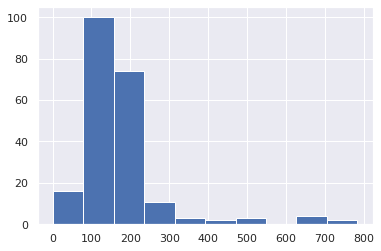

In [130]:
plt.hist(mdata['mdiff'])

(array([23., 83., 47., 35., 19.,  3.,  2.,  0.,  2.,  1.]),
 array([ 26.19507833,  53.53603794,  80.87699756, 108.21795718,
        135.5589168 , 162.89987642, 190.24083604, 217.58179565,
        244.92275527, 272.26371489, 299.60467451]),
 <BarContainer object of 10 artists>)

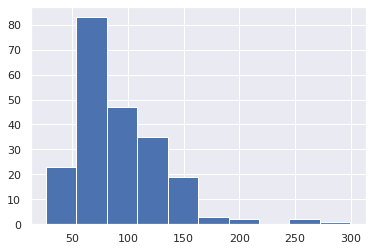

In [131]:
plt.hist(mdata['std1'])

(array([20., 59., 48., 43., 33.,  7.,  2.,  2.,  0.,  1.]),
 array([ 29.48068058,  56.49307997,  83.50547937, 110.51787876,
        137.53027815, 164.54267754, 191.55507694, 218.56747633,
        245.57987572, 272.59227512, 299.60467451]),
 <BarContainer object of 10 artists>)

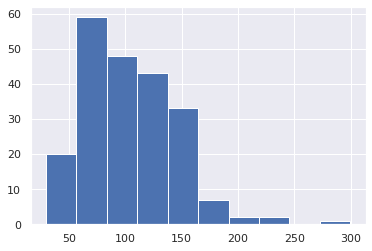

In [132]:
plt.hist(mdata['std2'])

In [82]:
pathex2 = '../data/data_plos_exp12/filtered_cleanedexp2.csv'
df = pd.read_csv(pathex2)
for ID in np.unique(df['id']):    
    this_subject = df[df['id'] == ID] # set to one particular subject
    X = np.array(this_subject['timecollect'][this_subject['timecollect']<1000])# when using np.log, make sure nan and infinity are excluded. 
    X = X.reshape(-1,1)
    data['id'].append(ID)
    data['Experiment'].append(2)
    AIC1, BIC1, model = learn_gaussian_mixture(X, plot = False, n_mixture = 1)
    data['AIC 1 Mixture'].append(AIC1[0])
    data['BIC 1 Mixture'].append(BIC1[0])
    AIC2, BIC2, model = learn_gaussian_mixture(X, plot = False, n_mixture = 2)
    data['AIC 2 Mixture'].append(AIC2[0])
    data['BIC 2 Mixture'].append(BIC2[0])
    AIC3, BIC3, model = learn_gaussian_mixture(X, plot = False, n_mixture = 3)
    data['AIC 3 Mixture'].append(AIC3[0])
    data['BIC 3 Mixture'].append(BIC3[0])    
    
    mdata['id'].append(ID)
    mdata['Best N Mixture AIC'].append(str(ott[np.argmin([AIC1, AIC2, AIC3])]))
    mdata['Best N Mixture BIC'].append(str(ott[np.argmin([BIC1, BIC2, BIC3])]))
    mdata['Experiment'].append(2)
    i = i+1

In [83]:
DATA = pd.DataFrame.from_dict(data)
mDATA = pd.DataFrame.from_dict(mdata)

In [70]:
DATA

,id,AIC 1 Mixture,AIC 2 Mixture,AIC 3 Mixture,BIC 1 Mixture,BIC 2 Mixture,BIC 3 Mixture,Experiment
0,1,12134.003954,12025.660436,11998.359652,12143.772928,12050.082869,12037.435545,1
1,2,11428.898089,10871.522568,10873.416801,11438.697535,10896.021184,10912.614586,1
2,3,12127.671514,11865.004319,11820.285338,12137.472975,11889.507972,11859.491183,1
3,4,11190.994363,10980.678275,10959.835444,11200.630024,11004.767428,10998.378089,1
4,5,10392.266953,10397.742579,10325.227766,10401.833603,10421.659205,10363.494368,1
...,...,...,...,...,...,...,...,...
227,86,11832.211290,11606.344603,11518.835561,11842.008719,11630.838176,11558.025277,2
228,87,12048.079682,11994.004368,11948.933695,12057.887176,12018.523104,11988.163673,2
229,88,12748.440017,12719.852894,12609.705523,12758.237446,12744.346467,12648.895239,2
230,89,12490.180615,12370.787097,12303.046179,12499.967928,12395.255379,12342.195429,2


In [71]:
DATA.loc[1]['AIC 1 Mixture']

11428.89808914368

In [51]:
DATA.to_csv('../data/data_plos_exp12/AICBICGMM.csv', index = True, header = True)

In [57]:
# histogram with the mixture of gaussian having the smallest AIC and BIC. How many particpants falls into each category. 

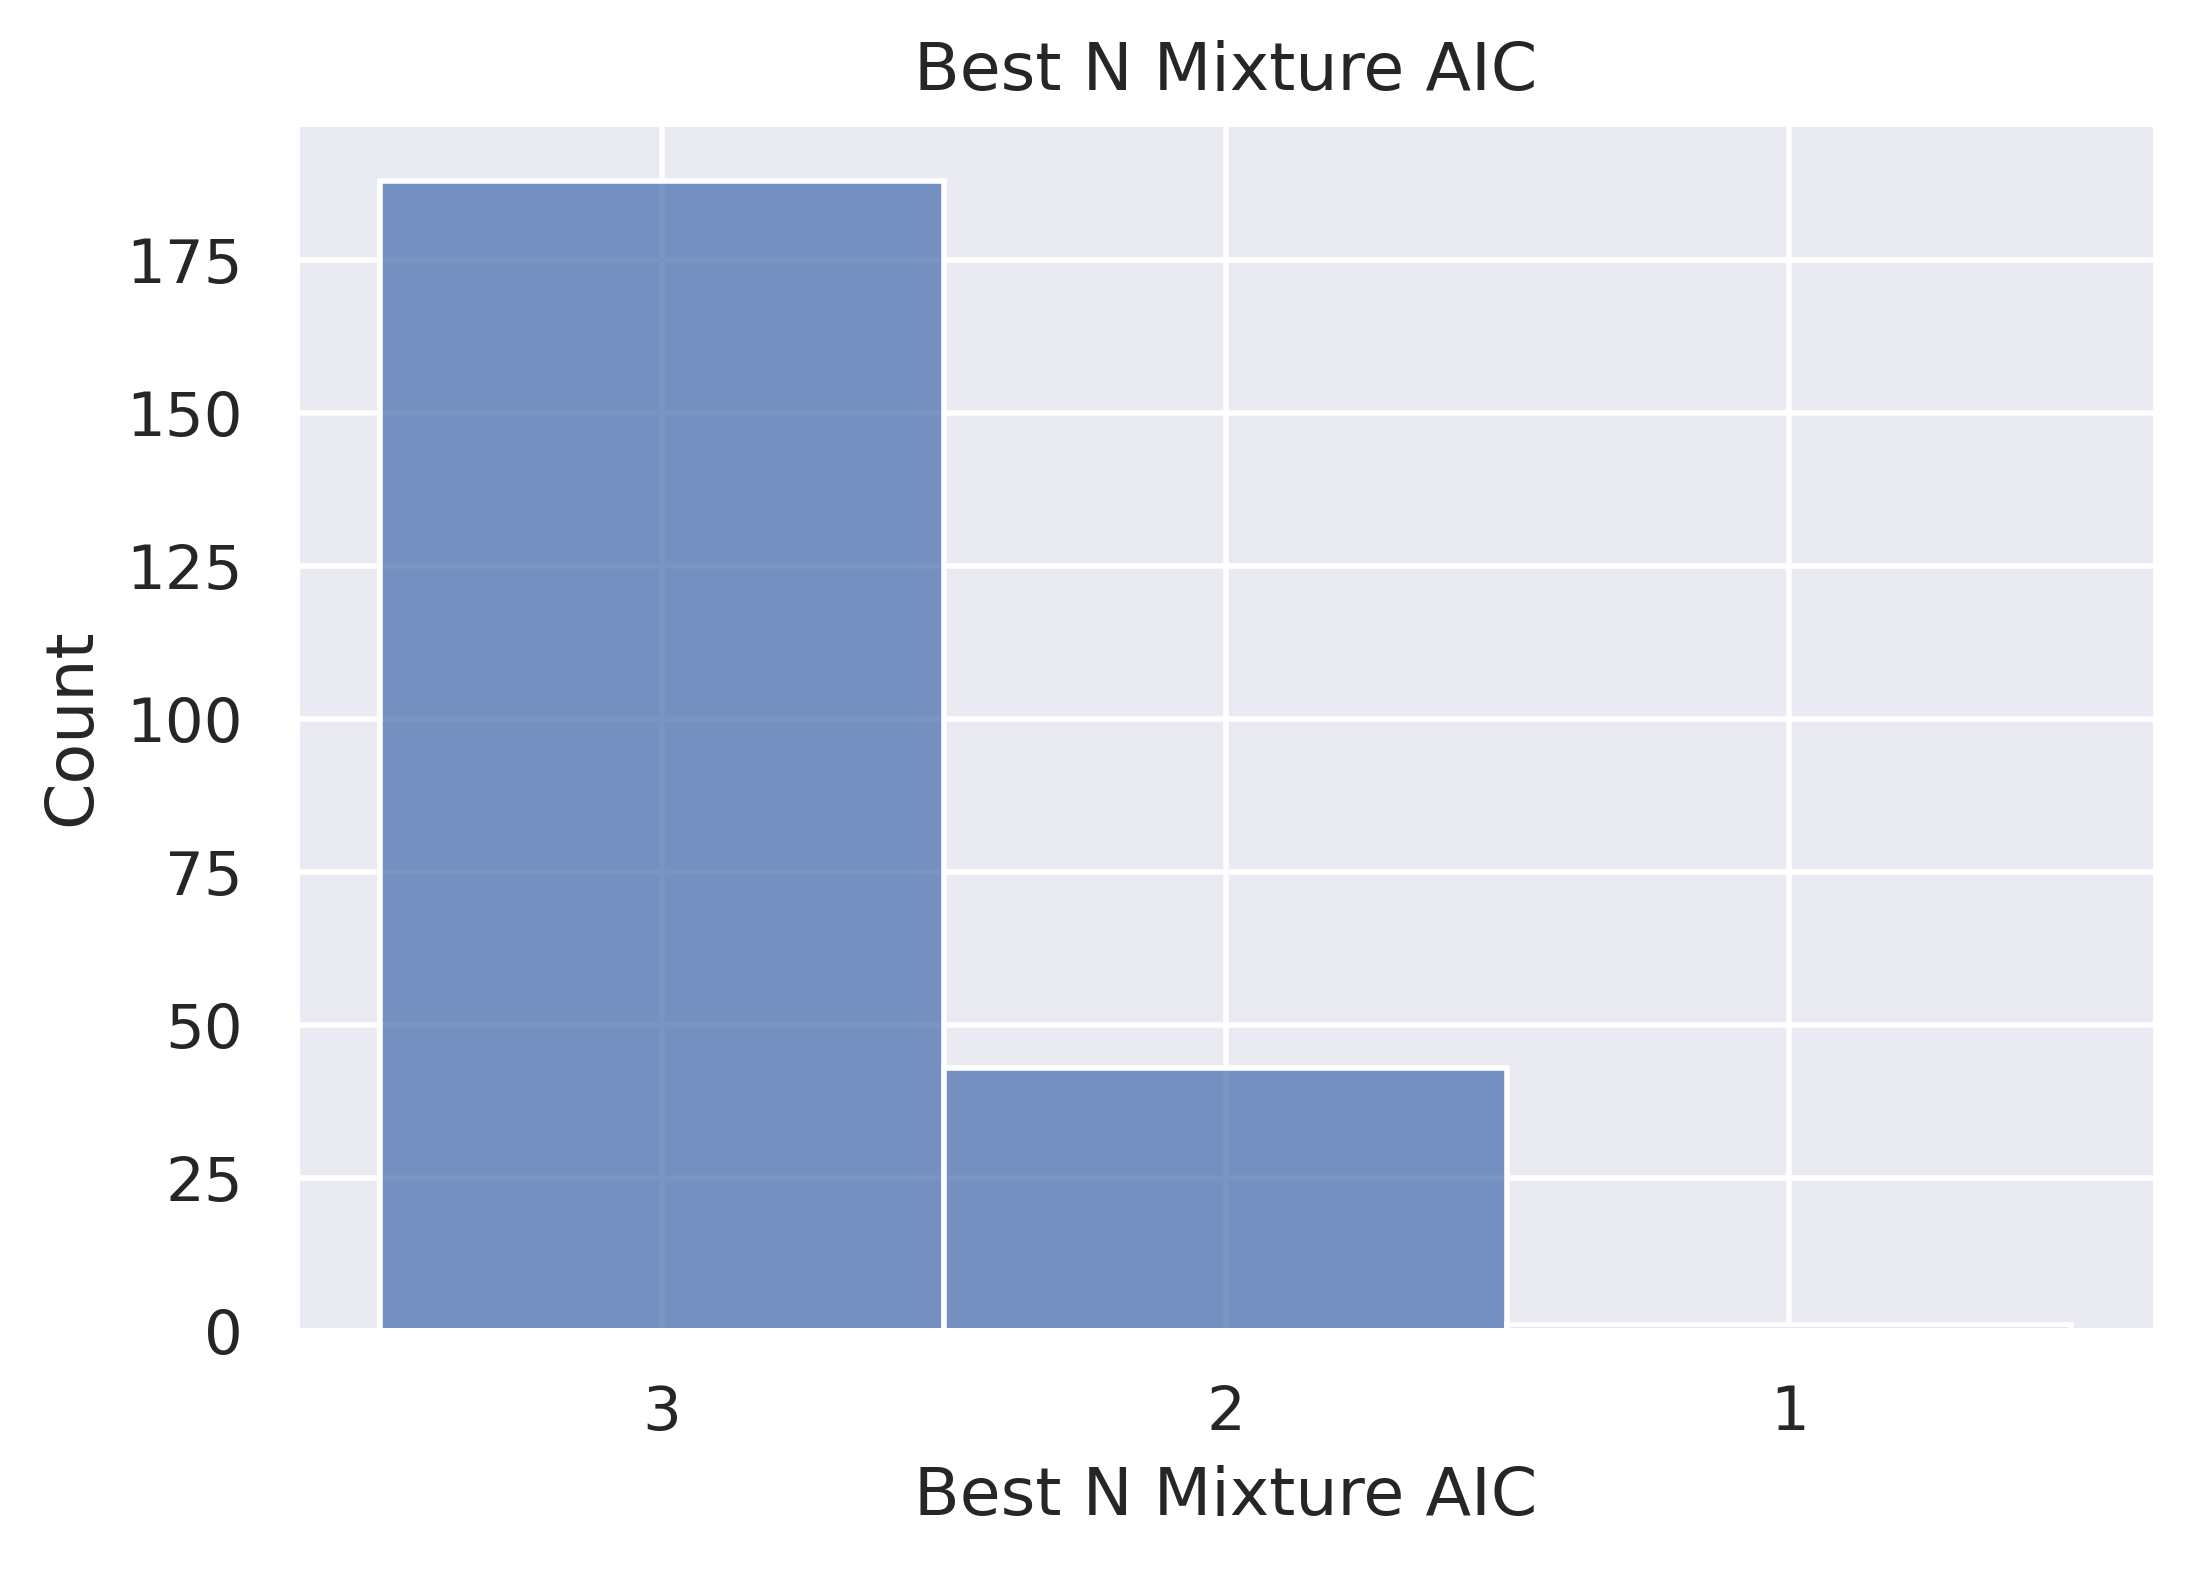

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(dpi = 400)
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=mDATA, x="Best N Mixture AIC")
plt.title("Best N Mixture AIC")
plt.show()

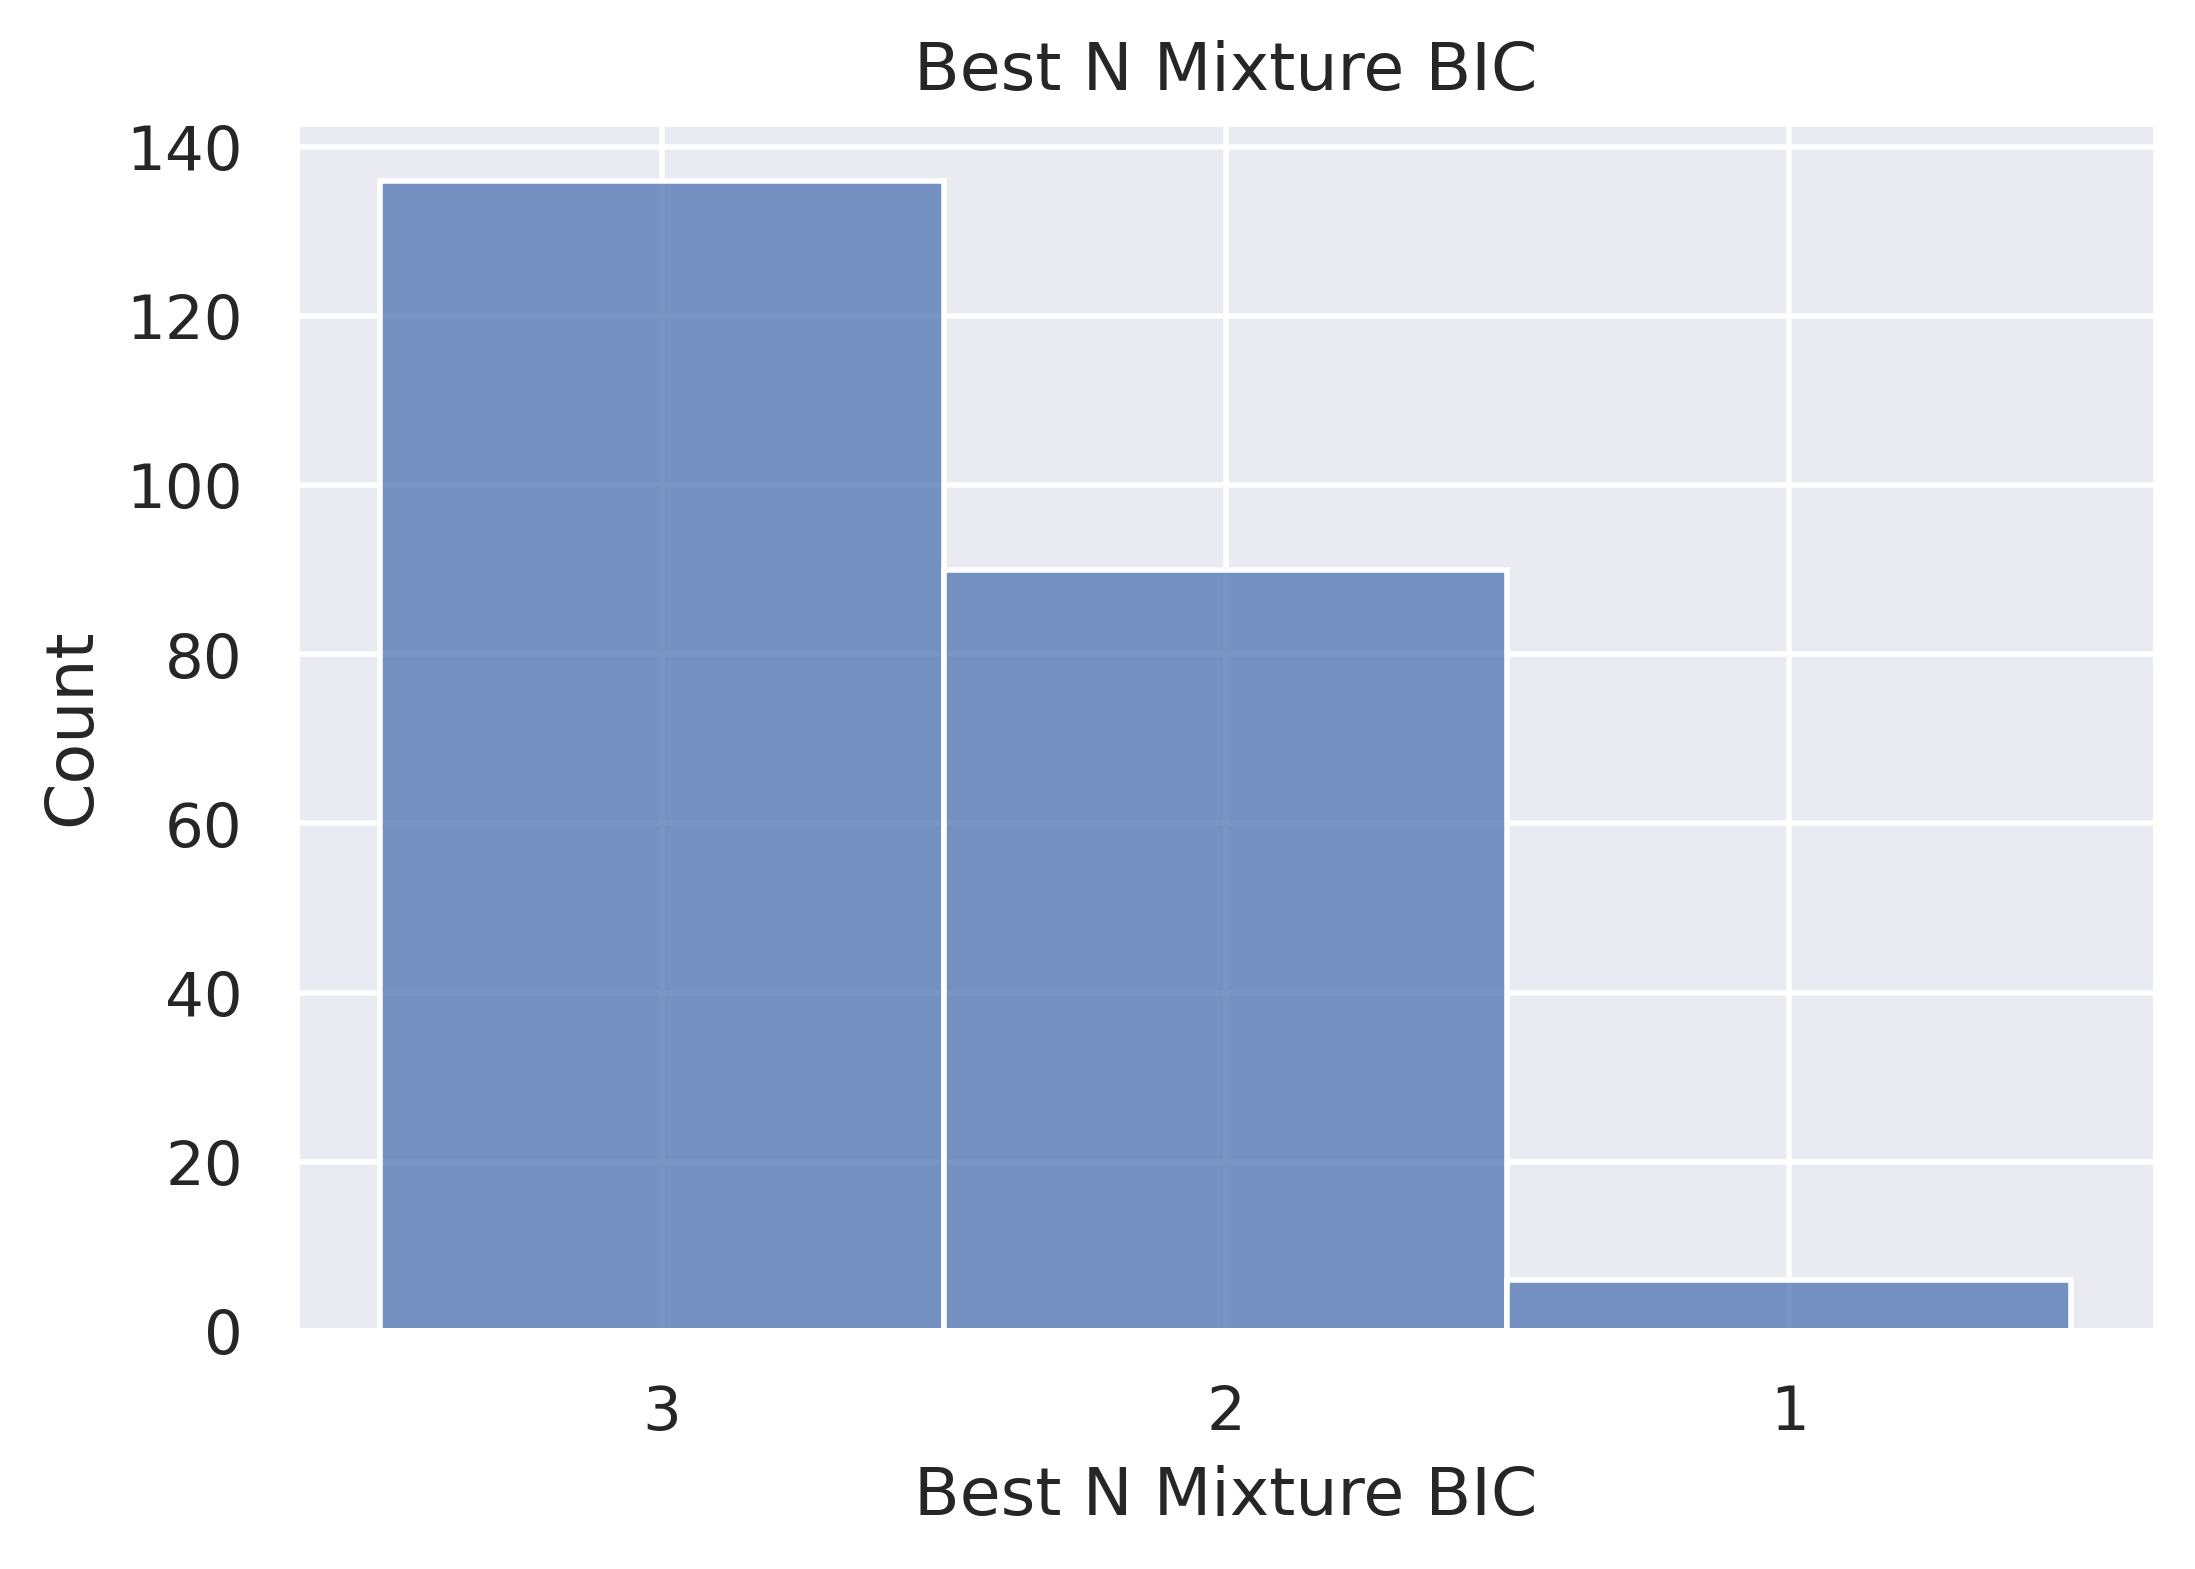

In [94]:
fig = plt.figure(dpi = 400)

sns.histplot(data=mDATA, x="Best N Mixture BIC")
plt.title("Best N Mixture BIC")
plt.show()